In [1]:
import numpy as np
from shapely import wkt

from business_models import hahn, greenplum



import pandas as pd

from shapely.geometry import Point,Polygon

from shapely.geometry import shape

import folium

# from cartoframes.viz import Map, Layer, color_continuous_style, palettes, histogram_widget

import numpy as np
import geopandas as gpd

# from cartoframes.viz import color_category_style, color_bins_style, popup_element, size_bins_style

# from cartoframes.viz import  basic_widget , category_widget

from shapely.geometry import shape, GeometryCollection

import time


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [21]:
from matplotlib import pyplot as plt

In [15]:
import statsmodels.api as sm

In [2]:
# сначала загрузить число заказов по неделям с лавки

In [7]:
df_orders_week = greenplum("""select
       place_id,
       cast(date_trunc('week', local_delivered_dttm)as date) as week,
       count(*)
from eda_cdm_marketplace.dm_lavka_order
where parcel_market_flg is false
                            and source_system ='bigfood'
                         and confirmed_flg
group by  place_id,
       cast(date_trunc('week', local_delivered_dttm)as date)
""")

In [9]:
df_orders_week.place_id.value_counts()

60287     117
71249     105
72413     103
72893     103
72896     102
         ... 
440494      2
298283      1
445982      1
445278      1
445283      1
Name: place_id, Length: 375, dtype: int64

In [30]:
buf = df_orders_week[df_orders_week.place_id==72893].copy()

In [47]:
buf = buf.sort_values('week')

buf.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


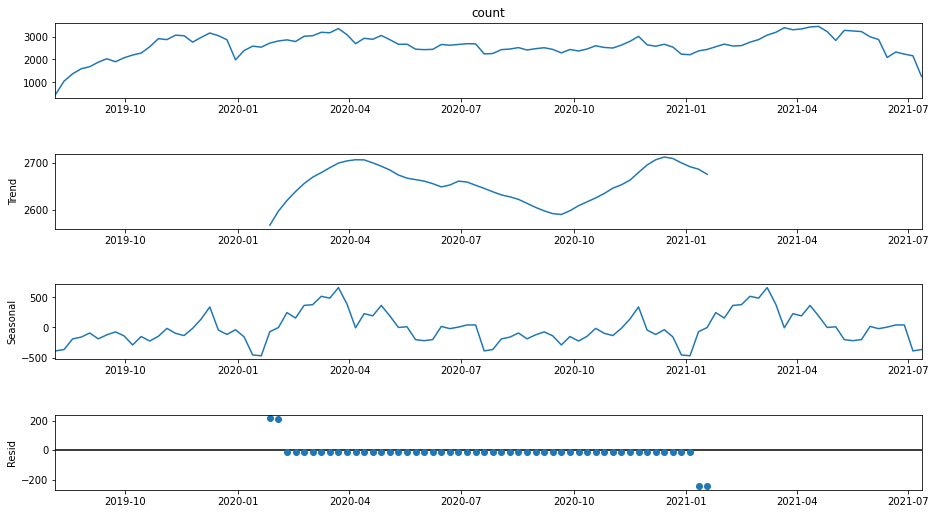

In [60]:
res = sm.tsa.seasonal_decompose(buf.set_index('week')['count'],freq=50)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [53]:
buf.isnull().mean()

place_id    0.000000
week        0.009709
count       0.000000
dtype: float64

In [63]:
df_orders_day= greenplum("""select
       place_id,
       cast(date_trunc('day', local_delivered_dttm)as date) as day,
       count(*)
from eda_cdm_marketplace.dm_lavka_order
where parcel_market_flg is false
                            and source_system ='bigfood'
                         and confirmed_flg
group by  place_id,
       cast(date_trunc('day', local_delivered_dttm)as date)
""")

In [64]:
buf_day = df_orders_day[df_orders_day.place_id==72893].copy()

In [68]:
buf_day=buf_day.sort_values('day')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


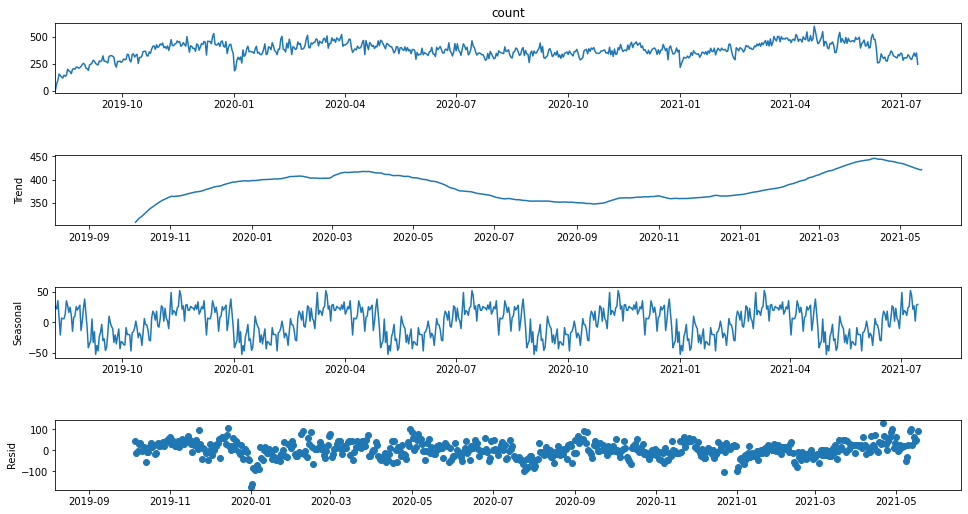

In [71]:
res = sm.tsa.seasonal_decompose(buf_day.set_index('day')['count'],freq=120)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [73]:
#ADF-test(Original-time-series)
# if data is stationary
res = sm.tsa.adfuller(buf['count'].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.108767093376337


In [75]:
res = sm.tsa.adfuller(buf_day['count'].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:1.7751014901395432e-11


In [ ]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(tra.diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(tra.diff().dropna(), lags=50, ax=ax[1])
plt.show()